In [1]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map


In [29]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)      

np.set_printoptions(precision=3)


In [3]:
#from google.colab import files
#uploaded = files.upload()


In [4]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

In [5]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)


In [6]:
#New
valid_survey_input.head()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [9]:
# examine the structure of the DataFrame object

valid_survey_input.describe()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,Industry_JavaScalaSpark,Industry_JavaScriptHTMLCSS,Industry_Python,Industry_R,Industry_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000


In [10]:
#New
valid_survey_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 5135740122 to 5109806898
Data columns (total 40 columns):
Personal_JavaScalaSpark             207 non-null int64
Personal_JavaScriptHTMLCSS          207 non-null int64
Personal_Python                     207 non-null int64
Personal_R                          207 non-null int64
Personal_SAS                        207 non-null int64
Professional_JavaScalaSpark         207 non-null int64
Professional_JavaScriptHTMLCSS      207 non-null int64
Professional_Python                 207 non-null int64
Professional_R                      207 non-null int64
Professional_SAS                    207 non-null int64
Industry_JavaScalaSpark             207 non-null int64
Industry_JavaScriptHTMLCSS          207 non-null int64
Industry_Python                     207 non-null int64
Industry_R                          207 non-null int64
Industry_SAS                        207 non-null int64
Python_Course_Interest              206 non-null float

In [11]:
# NEW
lang_int = valid_survey_input.iloc[:,0:15]


In [12]:

lang_int.head()


,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,Industry_JavaScalaSpark,Industry_JavaScriptHTMLCSS,Industry_Python,Industry_R,Industry_SAS
RespondentID,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,0,0,0,50,50
5133300037,10,10,50,30,0,25,25,30,20,0,20,25,40,15,0
5132253300,20,0,40,40,0,0,0,40,40,20,30,0,30,40,0
5132096630,10,10,25,35,20,10,10,25,35,20,10,10,25,35,20
5131990362,20,0,0,70,10,20,0,0,80,0,40,0,0,60,0


In [15]:
lang_int.mean().sort_values(ascending = False)

Personal_R                        37.125604
Professional_R                    36.415459
Industry_R                        32.434783
Personal_Python                   31.304348
Professional_Python               30.028986
Industry_Python                   29.772947
Industry_SAS                      18.884058
Professional_SAS                  18.463768
Personal_SAS                      16.637681
Industry_JavaScalaSpark           11.942029
Personal_JavaScalaSpark           10.135266
Professional_JavaScalaSpark        9.251208
Industry_JavaScriptHTMLCSS         6.966184
Professional_JavaScriptHTMLCSS     5.840580
Personal_JavaScriptHTMLCSS         4.797101
dtype: float64

In [16]:
# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 



Number of Respondents = 207


In [17]:
# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [18]:
# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professional_JavaScalaSpark  Professional_JavaScriptHTMLCSS  \
RespondentID             

In [19]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

In [20]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

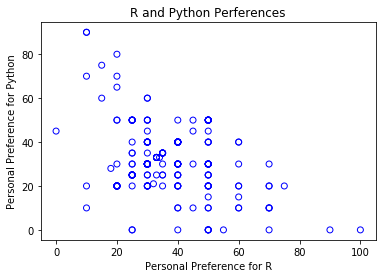

In [23]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25)  

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

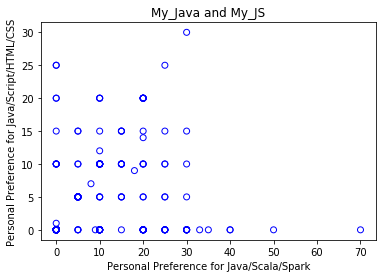

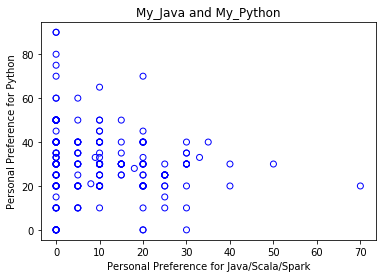

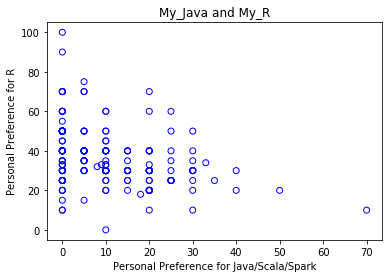

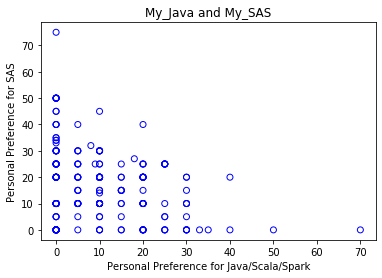

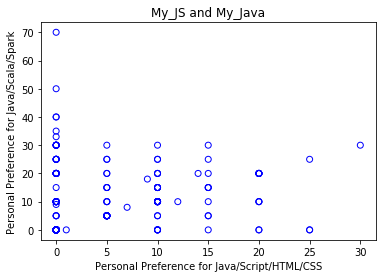

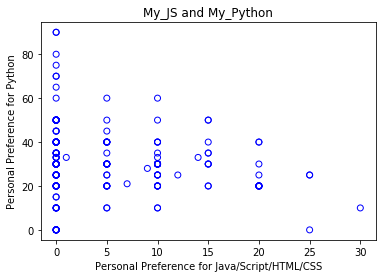

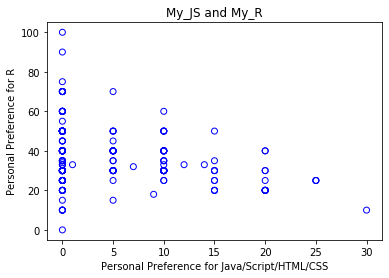

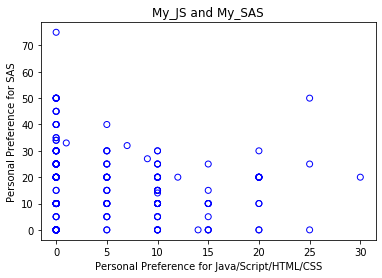

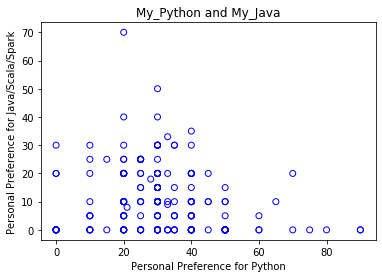

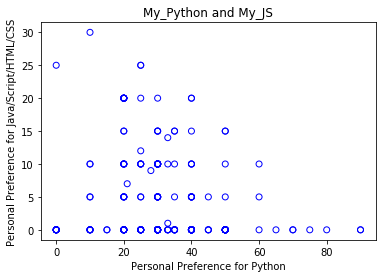

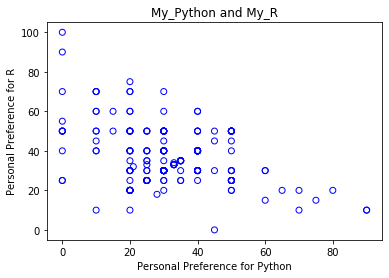

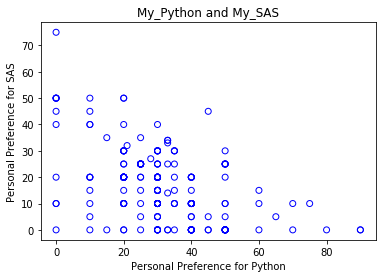

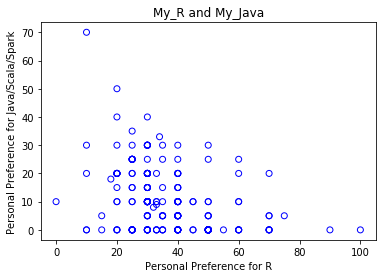

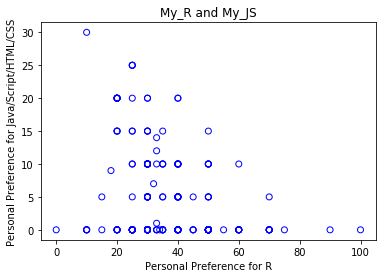

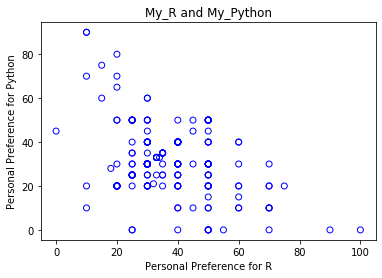

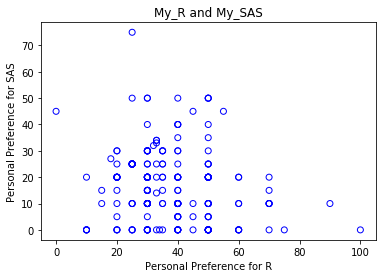

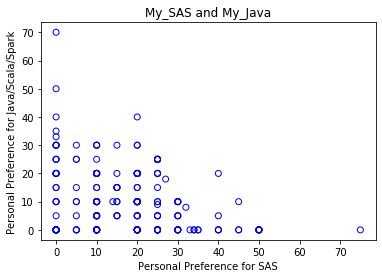

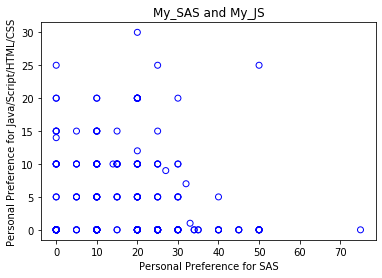

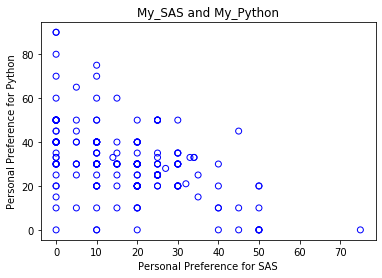

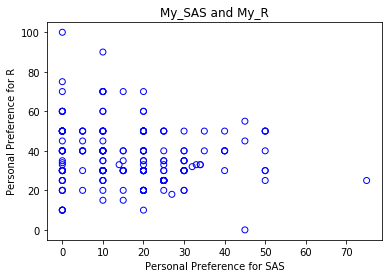

In [25]:
# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25)  


<Figure size 432x288 with 0 Axes>

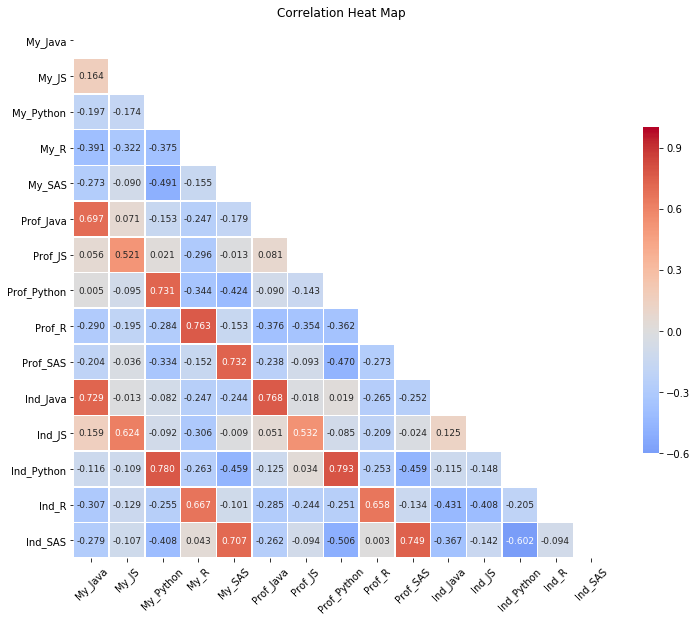

In [30]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

In [31]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [32]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


In [33]:
# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()


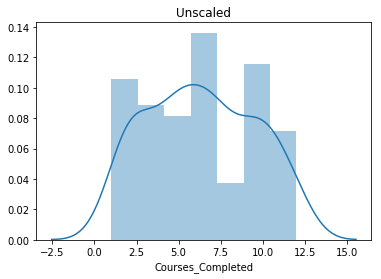

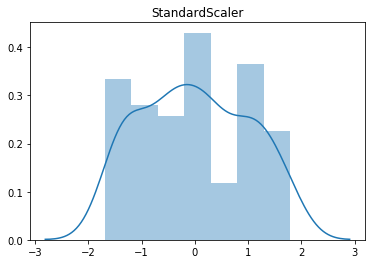

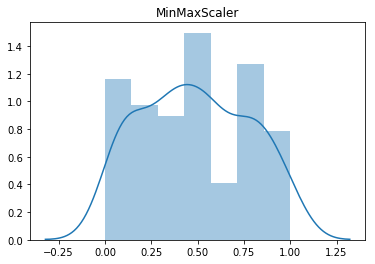

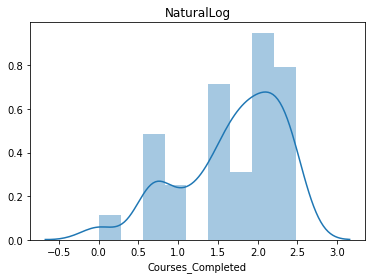

In [18]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.values.reshape([len(X),1]))).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape([len(X),1]))).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  


In [34]:
from collections import Counter
Counter(X)

Counter({6.0: 16,
         4.0: 13,
         7.0: 24,
         5.0: 24,
         11.0: 11,
         2.0: 25,
         3.0: 13,
         12.0: 10,
         8.0: 11,
         9.0: 14,
         1.0: 6,
         10.0: 20})

In [35]:
len(X)


187

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

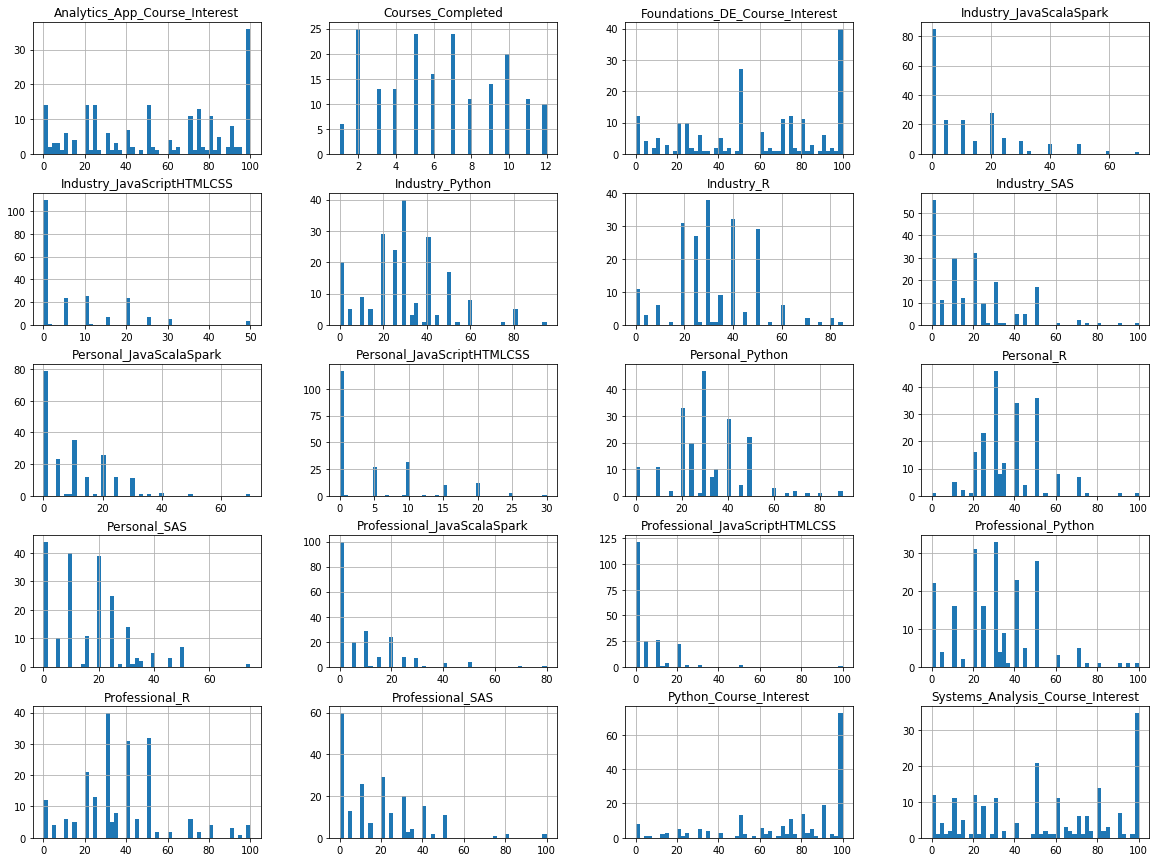

In [24]:
#New
valid_survey_input.hist(bins=50, figsize=(20,15))
plt.show()

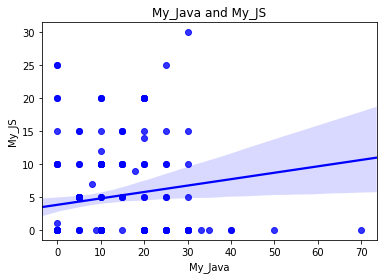

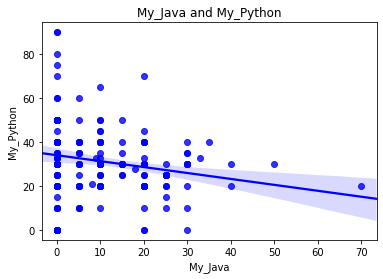

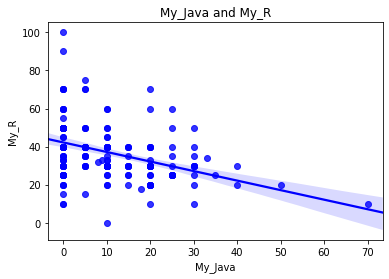

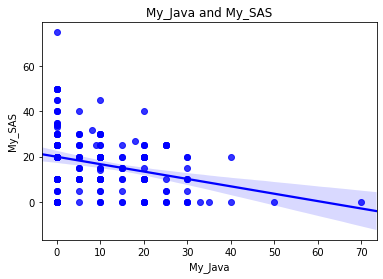

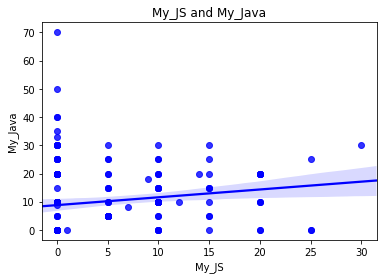

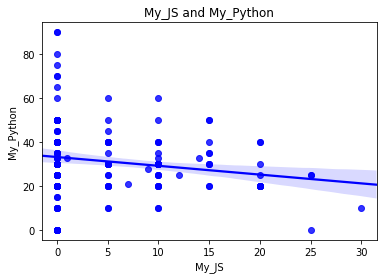

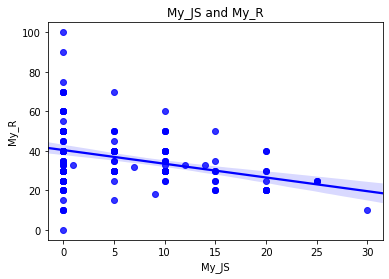

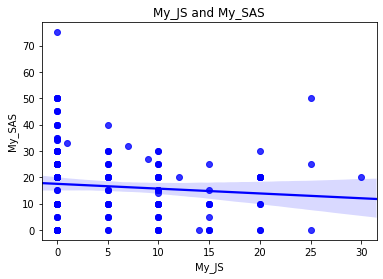

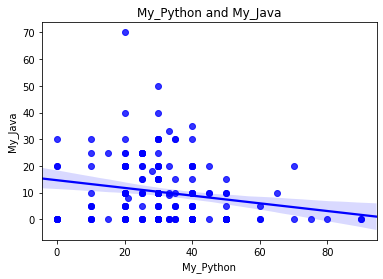

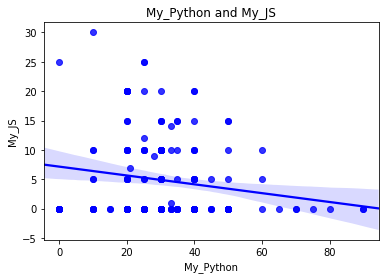

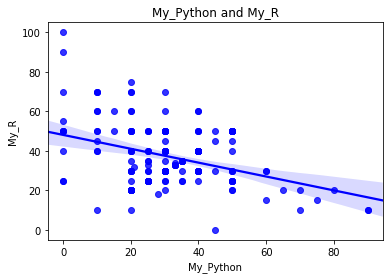

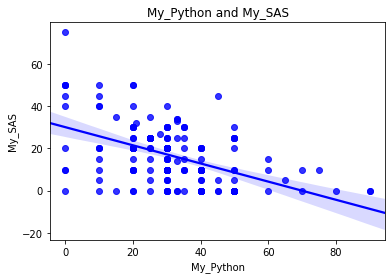

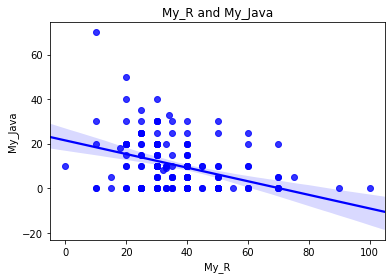

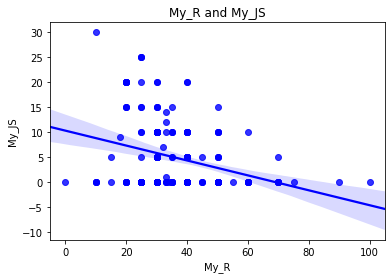

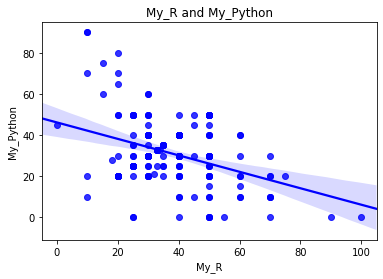

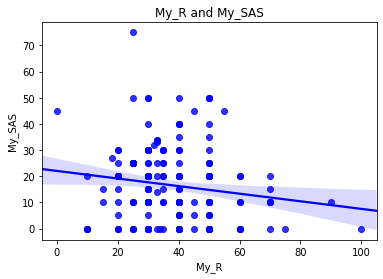

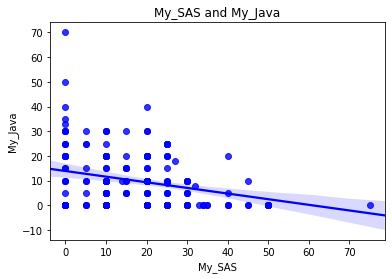

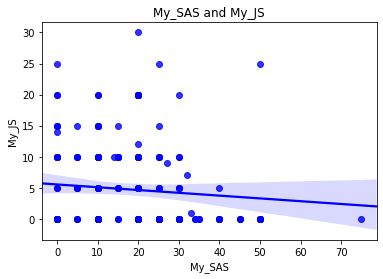

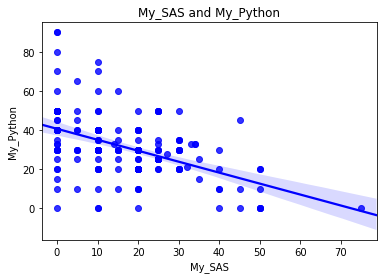

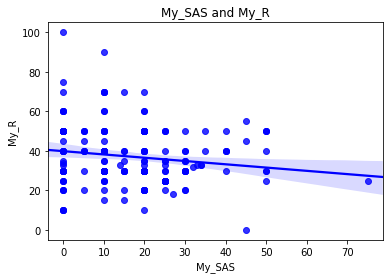

In [38]:
#New
# visualizing linear relationships
for i in range(5):
    for j in range(5):
        if i != j:
            
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()            
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = sns.regplot(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            color = 'blue')
            
            
            
           